### Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [1]:
#Importing Libraires
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [2]:
config = pd.read_csv("config.csv")

In [4]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAcessTokenSecret = config['twitterApiAcessTokenSecret'][0]

In [5]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAcessTokenSecret)
twitterApi = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
twitterAccount = "KamalaHarris"

In [26]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count=None,
                      since_id=None,
                      max_id=None,
                      trim_user=True,
                      exclude_replies=True,
                      contrububtor_details=False,
                      include_entities=False).items(50)

In [27]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contrububtor_details
Unexpected parameter: include_entities
Unexpected parameter: contrububtor_details
Unexpected parameter: include_entities
Unexpected parameter: contrububtor_details
Unexpected parameter: include_entities


In [28]:
df.head()

,Tweet
0,"This November, we need to hold on to the Unite..."
1,"In 2020, young voters told us they wanted coll..."
2,"If you believe in freedom, equality, and justi..."
3,"We refuse to let extremist, so-called leaders ..."
4,"This HBCU week, we celebrate these centers of ..."


In [37]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT :', '', txt)
    txt = re.sub(r'RT P:', '', txt)
    txt = re.sub(r'https?;\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [38]:
df['Tweet']= df['Tweet'].apply(cleanUpTweet)

In [39]:
df.head()

,Tweet,Subjectivity,Polarity
0,"This November, we need to hold on to the Unite...",0.00,0.00
1,"In 2020, young voters told us they wanted coll...",0.45,0.30
2,"If you believe in freedom, equality, and justi...",0.00,0.00
3,"We refuse to let extremist, so-called leaders ...",0.00,0.00
4,"This HBCU week, we celebrate these centers of ...",0.70,0.45


In [40]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [41]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [42]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [43]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"This November, we need to hold on to the Unite...",0.000000,0.000000
1,"In 2020, young voters told us they wanted coll...",0.450000,0.300000
2,"If you believe in freedom, equality, and justi...",0.000000,0.000000
3,"We refuse to let extremist, so-called leaders ...",0.000000,0.000000
4,"This HBCU week, we celebrate these centers of ...",0.700000,0.450000
5,States may extend Medicaid postpartum coverag...,0.400000,0.233333
6,We are 46 days until the midterm elections and...,0.000000,0.000000
7,"For years, Big Pharma tried to pocket bigger p...",0.300000,0.000000
8,"We will cancel up to $10,000 of federal studen...",0.066667,-0.166667
9,HBCUs have empowered and challenged students f...,0.000000,0.000000


In [45]:
df = df.drop(df[df['Tweet']==""].index)

In [47]:
df.head()

,Tweet,Subjectivity,Polarity
0,"This November, we need to hold on to the Unite...",0.00,0.00
1,"In 2020, young voters told us they wanted coll...",0.45,0.30
2,"If you believe in freedom, equality, and justi...",0.00,0.00
3,"We refuse to let extremist, so-called leaders ...",0.00,0.00
4,"This HBCU week, we celebrate these centers of ...",0.70,0.45


In [48]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [49]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [50]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,"This November, we need to hold on to the Unite...",0.000000,0.000000,Neutral
1,"In 2020, young voters told us they wanted coll...",0.450000,0.300000,Positive
2,"If you believe in freedom, equality, and justi...",0.000000,0.000000,Neutral
3,"We refuse to let extremist, so-called leaders ...",0.000000,0.000000,Neutral
4,"This HBCU week, we celebrate these centers of ...",0.700000,0.450000,Positive
5,States may extend Medicaid postpartum coverag...,0.400000,0.233333,Positive
6,We are 46 days until the midterm elections and...,0.000000,0.000000,Neutral
7,"For years, Big Pharma tried to pocket bigger p...",0.300000,0.000000,Neutral
8,"We will cancel up to $10,000 of federal studen...",0.066667,-0.166667,Negative
9,HBCUs have empowered and challenged students f...,0.000000,0.000000,Neutral


In [54]:
positive=df[df['Score']=="Positive"]
negative=df[df['Score']=="Negative"]
neutral = df[df['Score']=="Neutral"]
print("Positive Tweet Percentage : "+str(positive.shape[0]/df.shape[0]*100))
print("Negative Tweet Percentage : "+str(negative.shape[0]/df.shape[0]*100))
print("Neutral Tweet Percentage : "+str(neutral.shape[0]/df.shape[0]*100))
pos = positive.shape[0]/df.shape[0]
neg = negative.shape[0]/df.shape[0]
neu = neutral.shape[0]/df.shape[0]

Positive Tweet Percentage : 42.0
Negative Tweet Percentage : 6.0
Neutral Tweet Percentage : 52.0


In [72]:
explode = (0.05,0,0.05)
labels = 'Positive','Negative','Neutral'
sizes=[pos, neg,neu]
colors=['yellowgreen','lightcoral','gold']

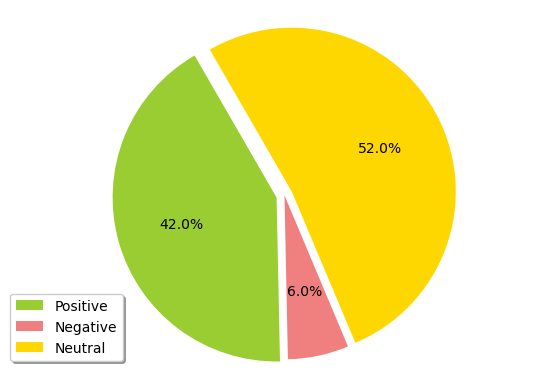

In [73]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment Analysis Score.png")

<BarContainer object of 3 artists>

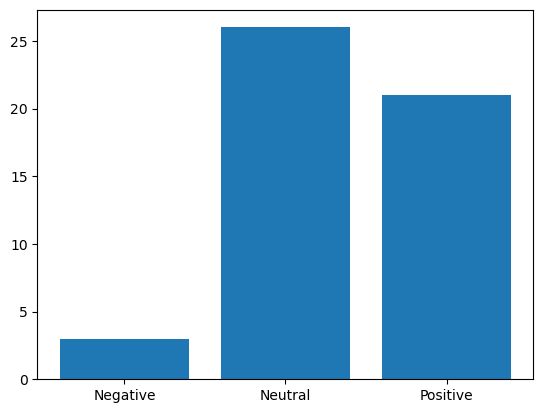

In [74]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels,values)

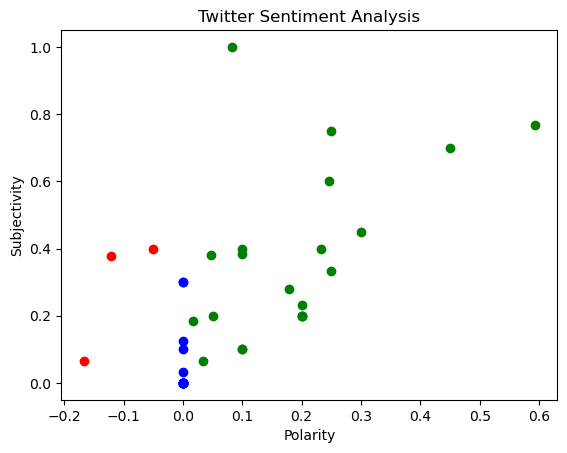

In [76]:
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
        
plt.title("Twitter Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.savefig("Sentiment Analysis Scatter.png")